<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-8/blob/s_work/Demo_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate Speech Detection on Social Media Comments.
### **Problem Statement** :

In the digital age, social media platforms face significant challenges in maintaining a safe and respectful online community, particularly with the proliferation of hate speech in user-generated comments. The primary objective is to develop a robust hate speech detection system using advanced natural language processing (NLP) techniques to enhance content moderation capabilities on Social Media Platforms. Efficient hate speech detection is pivotal for maintaining platform integrity and user trust, ensuring comments are following the Guidlines.

### **Solution**:

This project aims to develop an AI model to detect hate speech in the Social Media comment Section. The model is trained using a labeled dataset and employs various natural language processing (NLP) techniques to identify and classify hate speech.

**Steps:**

**Data Preparation**: Collected and preprocessed data. The Preprocessing Involves various data cleaning steps and EDA for getting insights about the quality of the data.

*Removing punctuations

*Removing common stopwords

*Tokenization & Lemmatization

*Reassembling tokens

*Removing special characters and emojis

*Removing URLs

*Creating a feature for text length



**Model Development**: Developed various ML and DL models and evaluated them to select the best performing ones from each of them. Here, we made use of TF-IDF embedding and built a deep learning model involving various layers. The model was trained on the cleaned data.

TF-IDF Embedding
After testing various embedding techniques, TF-IDF was the best fit for our dataset.

**Performance**: The Deep Learning model's performance was then evaluated using various metrics, but the main focus was on the F1 score, which is a combination of precision and recall. The DL model was able to achieve a good F1 score, making it efficient for the next step.

**Prediction**: The DL Model is ready for real-time detection on the comments to check how the model performs on real-time data.

### **Dataset Description**

The dataset contains 10,000 entries sourced from the Hate Speech Curated Dataset on Kaggle. Given the size and complexity of the original dataset, we selected a balanced subset of 10,000 rows, ensuring an equal ratio of hate speech to non-hate speech. The dataset is straightforward, comprising text comments from various social media platforms and corresponding labels indicating whether the comment is hate speech or not.

link: https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset



### **Data Visualization**
a. Train & Test data size
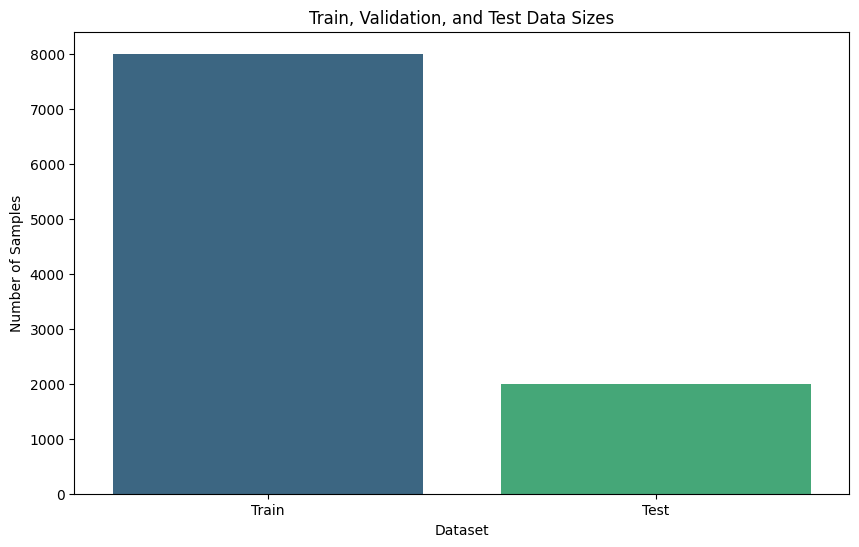

b. Label wise split in train data:
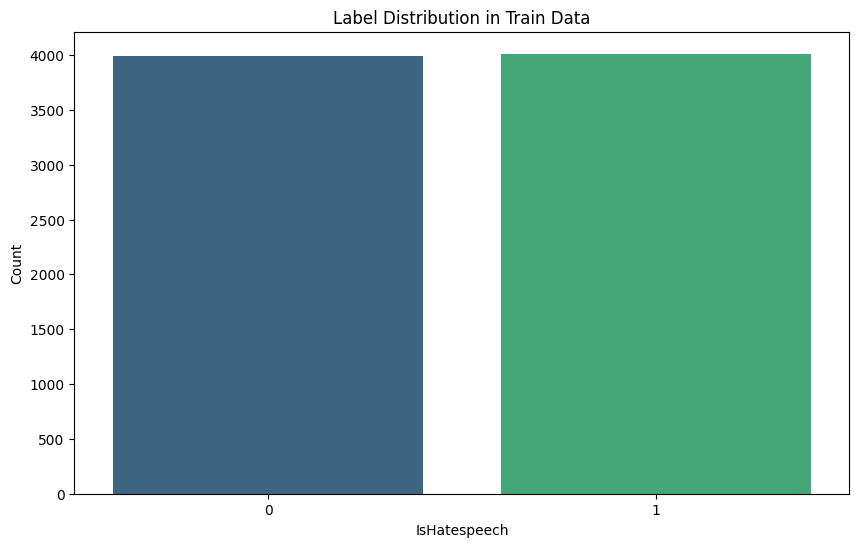

### **DL Model**:


The best model consist of varity of layers stacked together. The Model summary is shown below.



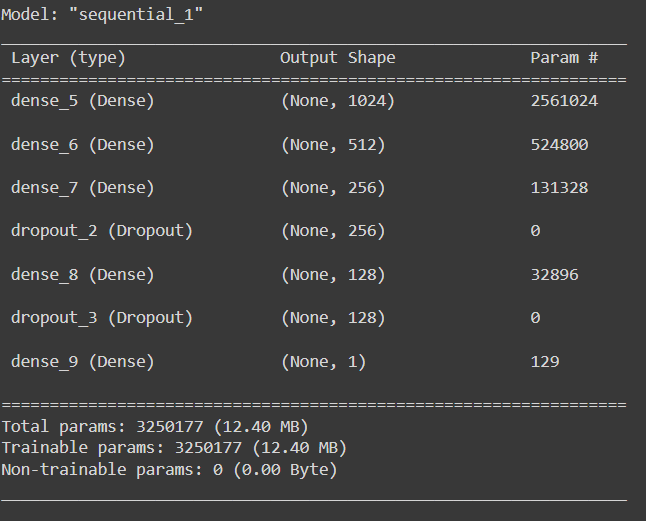

**Model Performance**
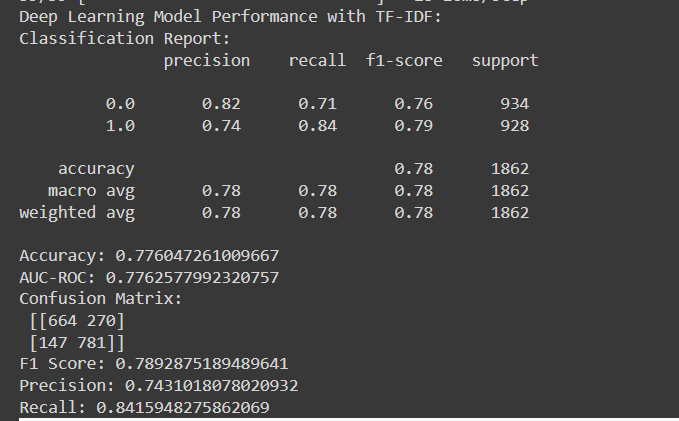
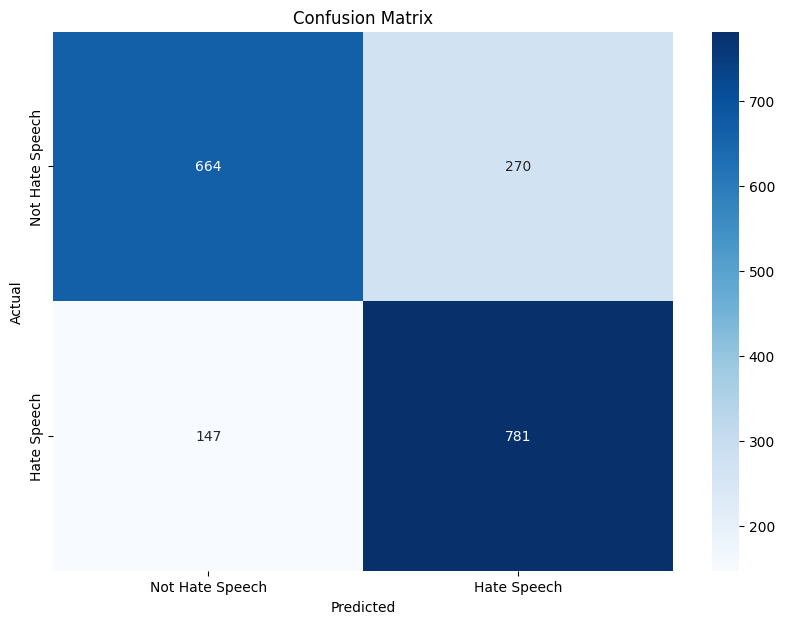

### Sample Prediction

In [36]:
import re
import pandas as pd
import pickle

import nltk
import contractions
import string
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

DetectorFactory.seed = 0

def preprocess_text(text):
    text = text.lower()
    try:
        if detect(text) != 'en':
            return ""
    except:
        return ""
    text = BeautifulSoup(text, "html.parser").get_text()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    expanded_words = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_words)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)

    return clean_text


with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

with open('Hatespeech_Model.pkl', 'rb') as f:
    model = pickle.load(f)

def predict_hate_speech(text):
    preprocessed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text]).toarray()
    prediction_prob = model.predict(text_tfidf)
    text_tfidf
    prediction = (prediction_prob > 0.5).astype("int32").flatten()
    return "Hate Speech" if prediction[0] == 1 else "Not Hate Speech"



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
text = input("Enter the Comment:")
print(f"Text: {text}")
print(f"Prediction: {predict_hate_speech(text)}")

Enter the Comment:Car runs fast today
Text: Car runs fast today
1/1 [==============================] - 0s 37ms/step
Prediction: Not Hate Speech
